# TOLNet
Authors: Maurice Roots, Arthur Perng

Advisor: John Sullivan

This notebook details how to use the TOLNet API to fetch and plot ozone data with various filters, such as processing type and instrument group/location. In addition, a section is included for fetching GEOS CF ozone profiles for comparison. Future work will incorporate analysis efforts and notebooks per community requests, for instance to better characterize future products from the TEMPO instrument. 

Please send any questions or comments to John Sullivan (john.t.sullivan@nasa.gov).

For more information on TOLNet, visit https://tolnet.larc.nasa.gov/




## Table of Contents:
- Overview
- Example Case Study
- Python package overview
    - Additional plotting parameters
- Comparison with GEOS CF data

## Overview <a class="anchor" id="tolnet_overview"></a>

TODO: Add out API and data format explanation

An interagency network initiated by NASA, NOAA, and EPA in 2011 began, known as the Tropospheric Ozone Lidar Network (TOLNet). Charter lidar systems are affiliated with NASA GSFC, NASA LaRC, NASA Jet Propulsion Laboratory (JPL), NOAA Earth System Research Laboratory/Chemical Sciences Lab (ESRL/CSL), and the University of Alabama, Huntsville. An international collaboration with Environment and Climate Change Canada (ECCC) has also been established, as well as a modeling component at NASA Ames Research Center (ARC) and data archiving administered at NASA LaRC. Lidar systems have recently been developed at both CCNY and Hampton University. Ozone lidars within TOLNet provide accurate observations under both daytime and nighttime conditions and generate consistent, long-term datasets. Most of the instruments are portable and have been deployed previously in air quality campaigns (map at the end of this notebook details the deployment locations) in coordination with federal, state and local agency’s interests. The TOLNet data is accessible online (https://tolnet.larc.nasa.gov/) and can be accessed through this notebook. Consulting with the instrument principal or coinvestigators before usage is highly encouraged.

TODO: Updated Map below

## Example Case Study  <a class="anchor" id="case_study"></a>

On July 12th, 2023, the air quality surrounding the Goddard Space Flight Center was particularly poor, with an ozone index of about 100(Unhealthy for sensitive groups).  
We will use the TOLNet API to graph the ozone data at GSFC during this time.  

Then, we import it with python.

In [1]:
from tolnet import TOLNet
tolnet = TOLNet() # Creates an object that retrieves data from the API and stores it

We only want data from the GSFC area around June 12th. As such, we filter accordingly:

In [2]:
date_start = "2023-07-11"
date_end = "2023-07-13"
group = [2] # List of instrument group IDs to filter by. We only want GSFC(ID=2), so this list only contains 2.
product_ID = [4] # Filter for high-resolution files only

tolnet.import_data(min_date=date_start, max_date=date_end, instrument_group=group, product_type=product_ID)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.21s/it]


Then, we plot the data. One curtain plot is created for each combination of instruent group and processing type, which is 2 in this case(GSFC In-house processed, GSFC centrally processed).

C:\Users\meroo\OneDrive - UMBC\Research\NASA\Summer 2024\TOLNET_DEMO\tolnet.py:519: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


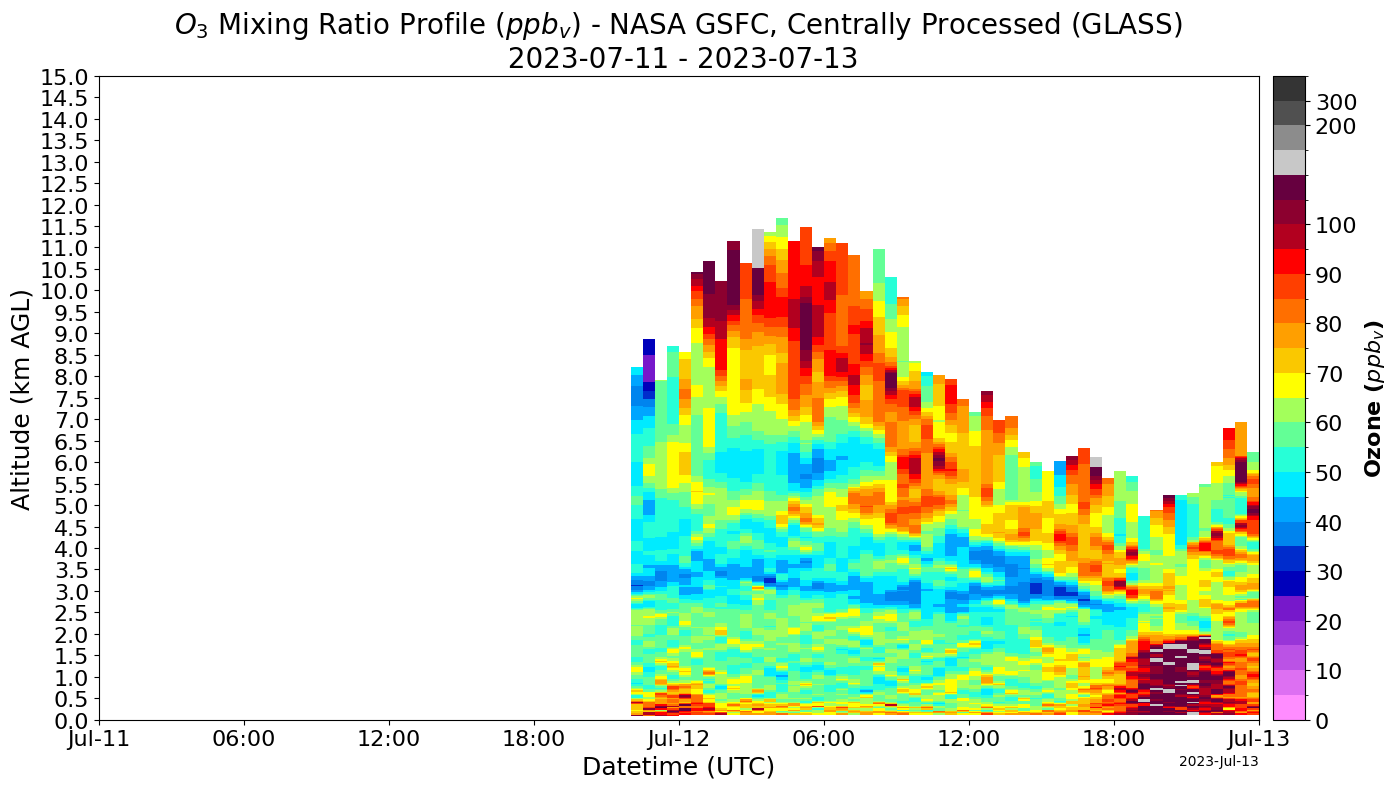

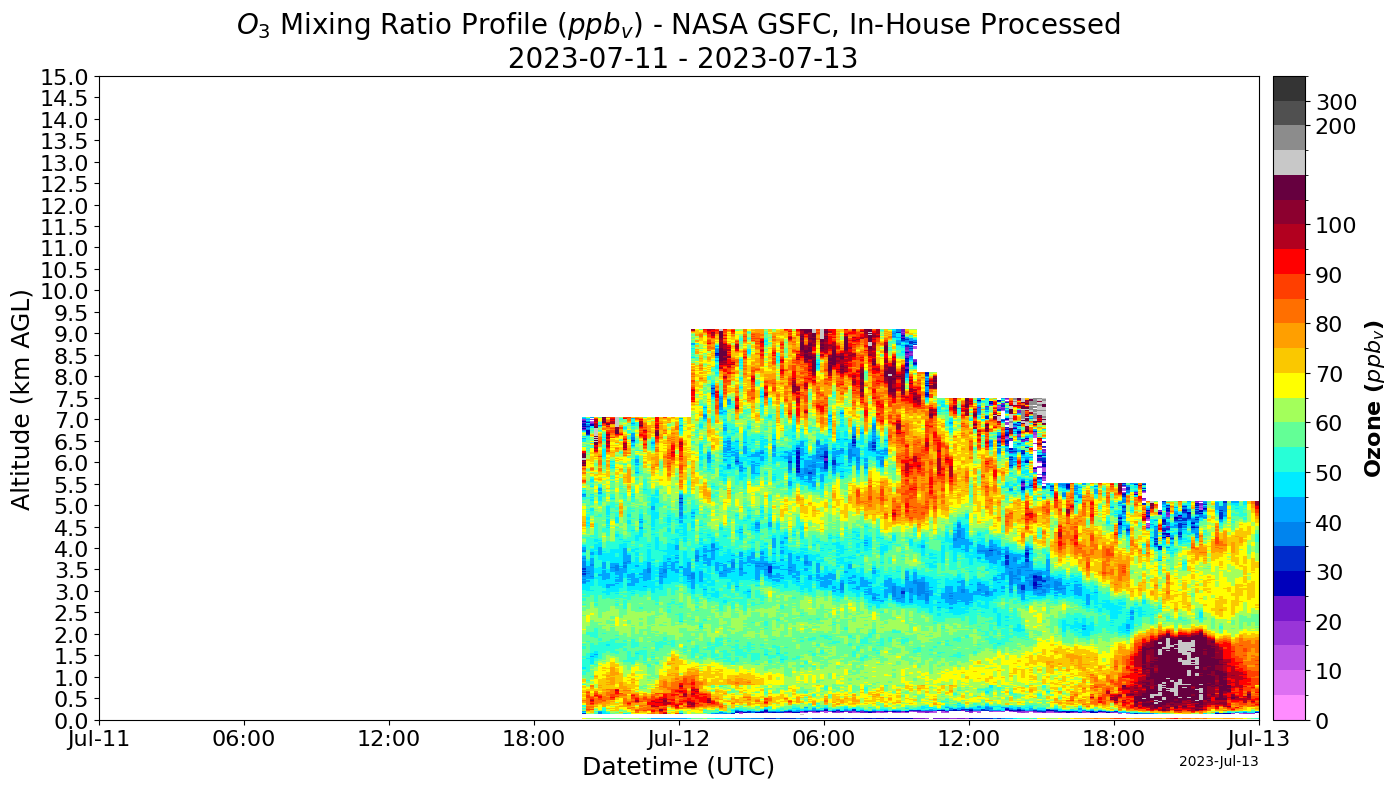

In [3]:
df = tolnet.tolnet_curtains()

We can see that there is an enhancement of dark red and gray on both graphs at around 6:00-12:00 PM on July 12th, signalling an ozone ppbv(parts per billion) of 100 or higher. (The EPA standard is 75 parts per billion, and any more is considered unhealthy.) This corresponds to the worsened air quality index on that day.

## Package Overview <a class="anchor" id="package_overview"></a>

In [4]:
from tolnet import TOLNet
tolnet = TOLNet() # tolnet now refers to an object that is capable of retrieving data from the API

Each of these functions prints the ID of each parameter you can filter by. It is recommended to filter your query by product type = 4(HIRES), as processing other products is not supported at this time.

In [5]:
# Prints querible parameters.
tolnet.print_product_types()
# tolnet.print_processing_types()
# tolnet.print_instrument_groups()
# tolnet.print_file_types()


 TOLNET product IDs:
 id product_type_name                                                         description
  1           O3Lidar                  Vertical profiles of ozone using a lidar technique
  2           Surface                            In-situ measurements of surface products
  3             Other        Data that is not ozone lidar or surface in-situ measurements
  4             HIRES                       Highest temporal and vertical resolution data
  5            CALVAL Optimized for specific comparative evaluation of satellite or sonde
  6              CLIM                        Optimized for climatology and trends studies
  7           Gridded    Regridded HIRES data to a common TOLNet-wide grid for evaluation
  8            Legacy      generic HDF or TOLNet ASCII data products (Contact PI for use) 



In [6]:
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4] # HIRES

# Fetches data using the TOLNet object. min_date and max_date are required, but other parameters are optional.
# Stores the data in the object, which can be accessed with tolnet.data and tolnet.meta_data.
# This will prompt the user for confirmation if the query would download every file from the API.
# Querible parameters are processing_type, instrument_group, product_type, and file_type. 
# All parameters require a list of IDs.
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs)


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:36<00:00,  2.26s/it]


C:\Users\meroo\OneDrive - UMBC\Research\NASA\Summer 2024\TOLNET_DEMO\tolnet.py:519: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


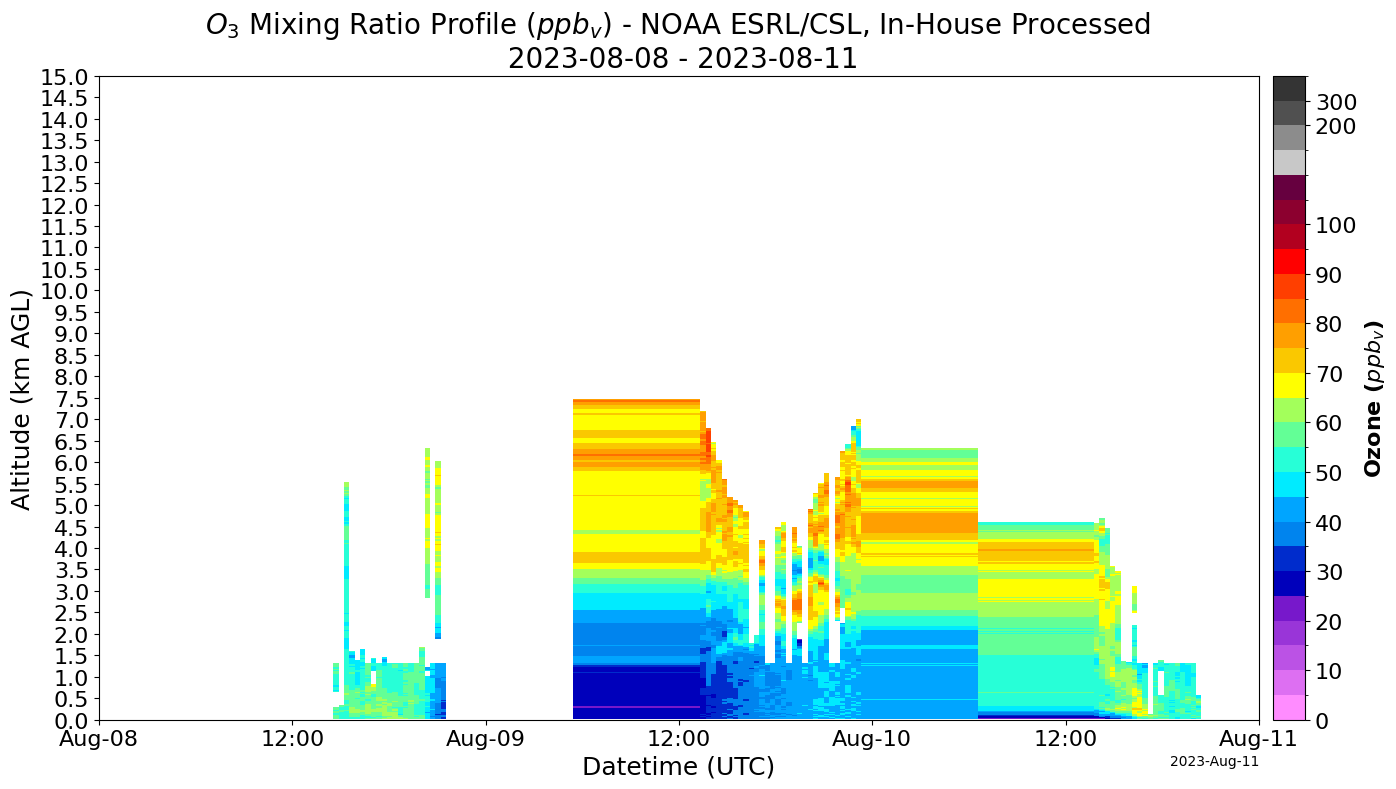

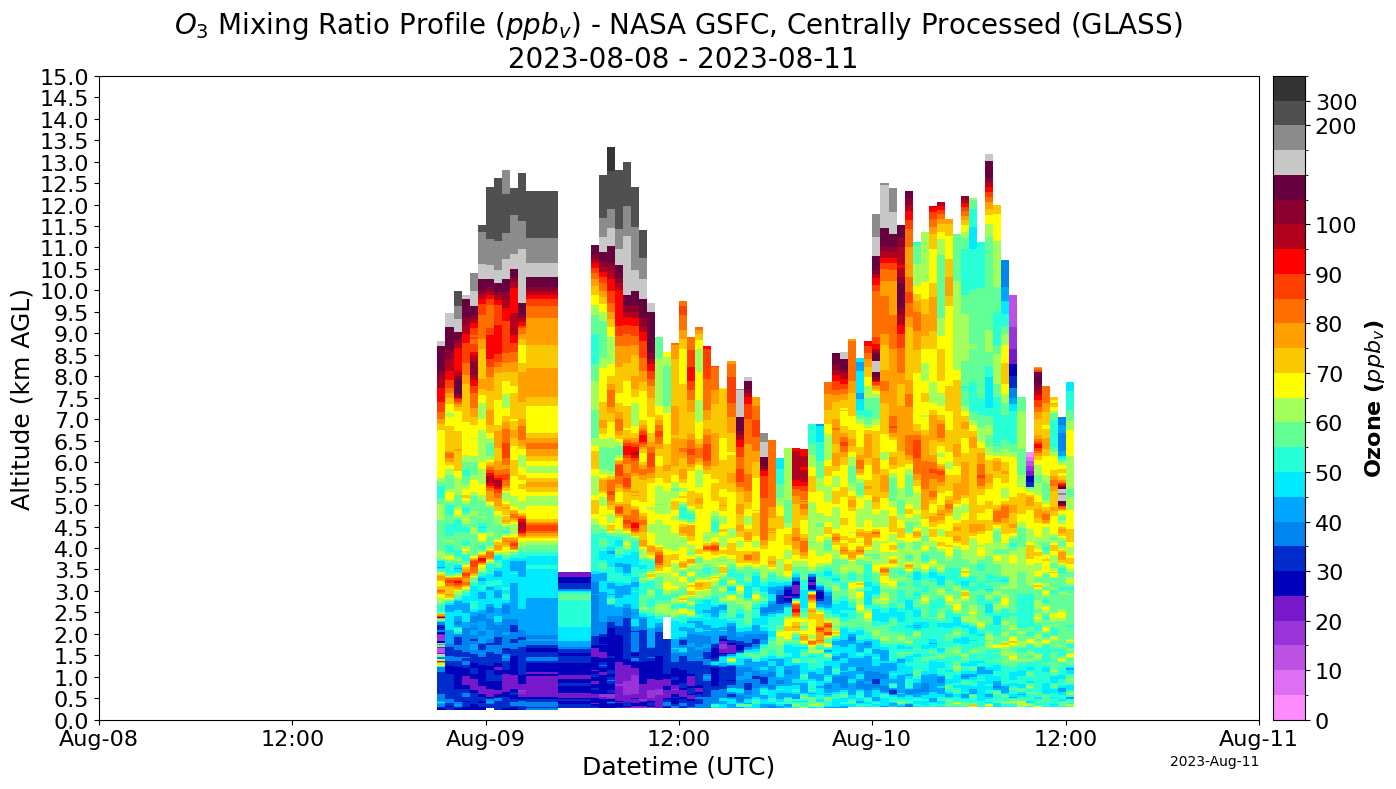

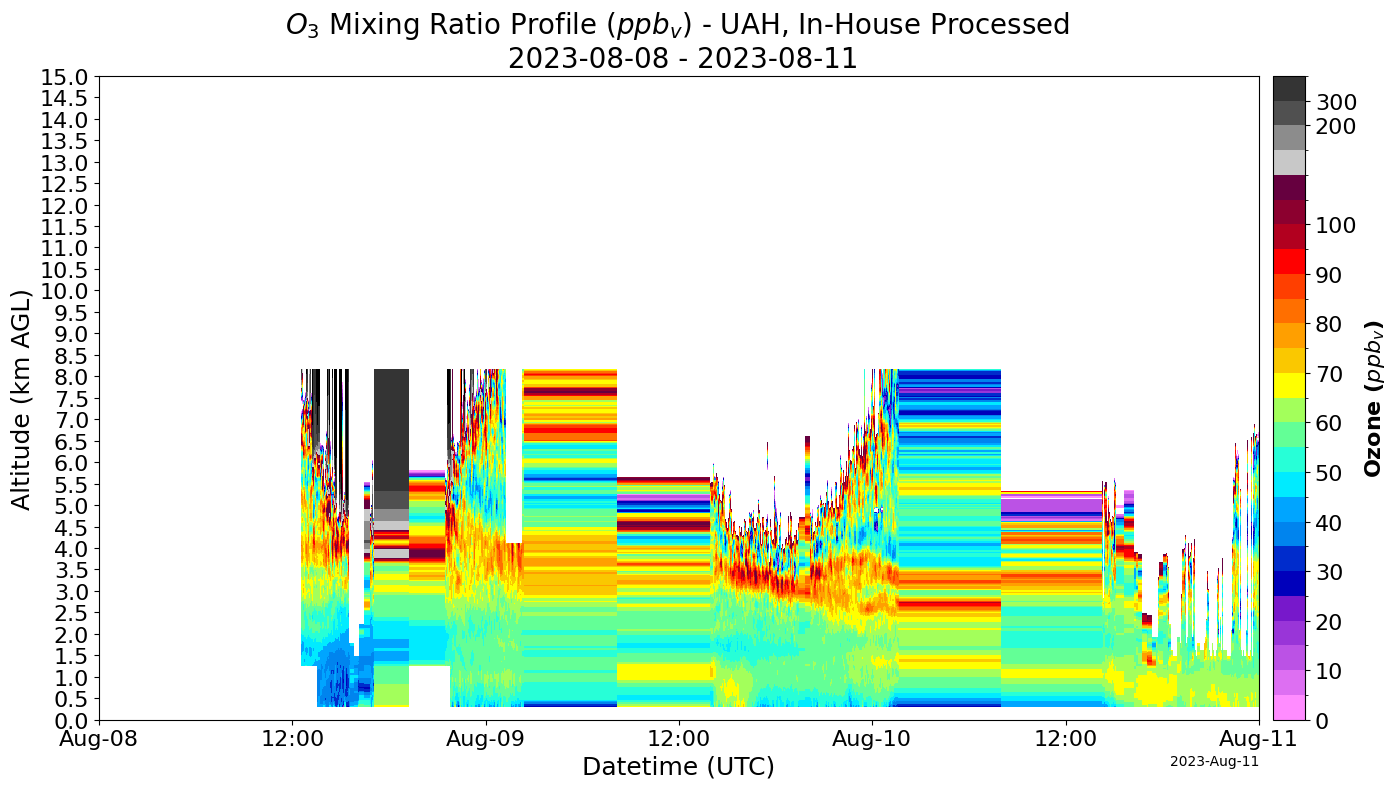

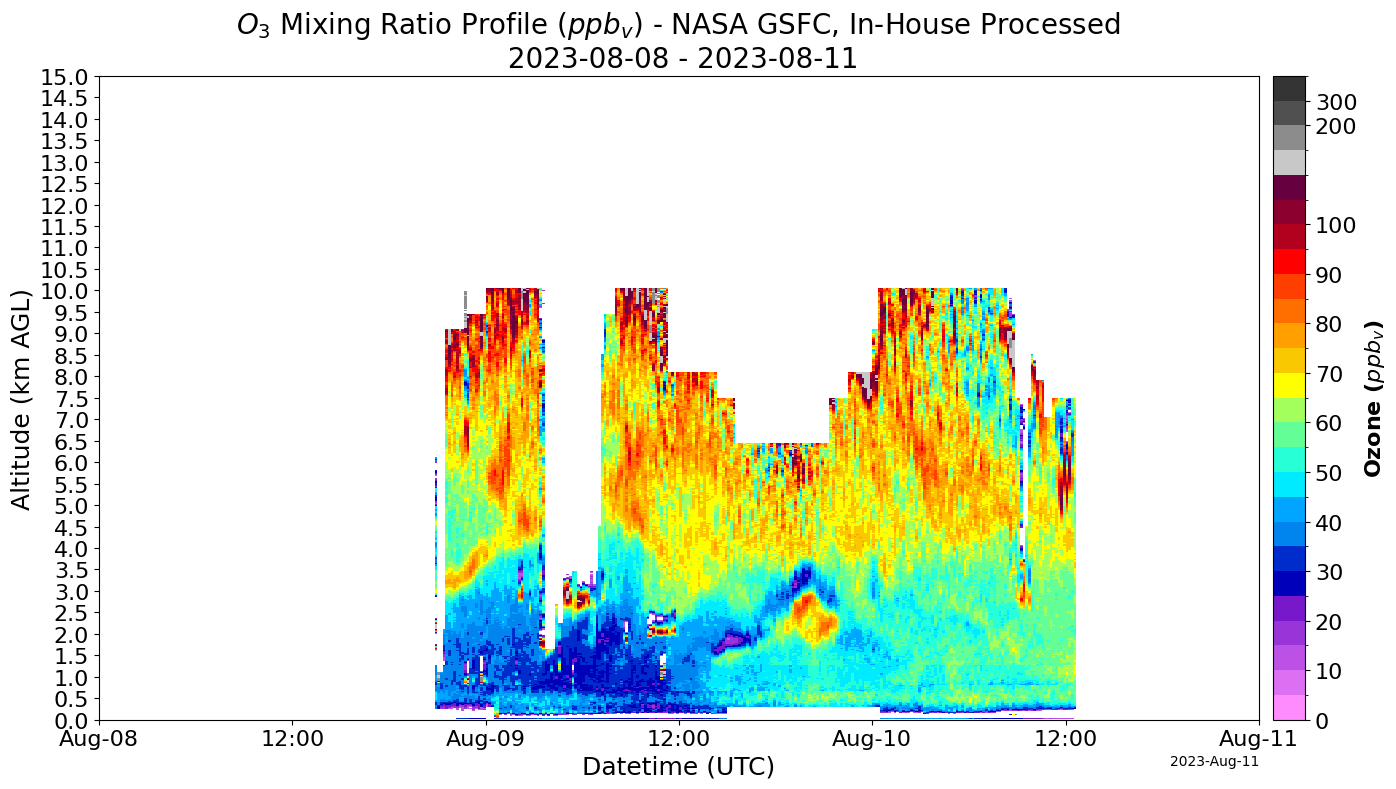

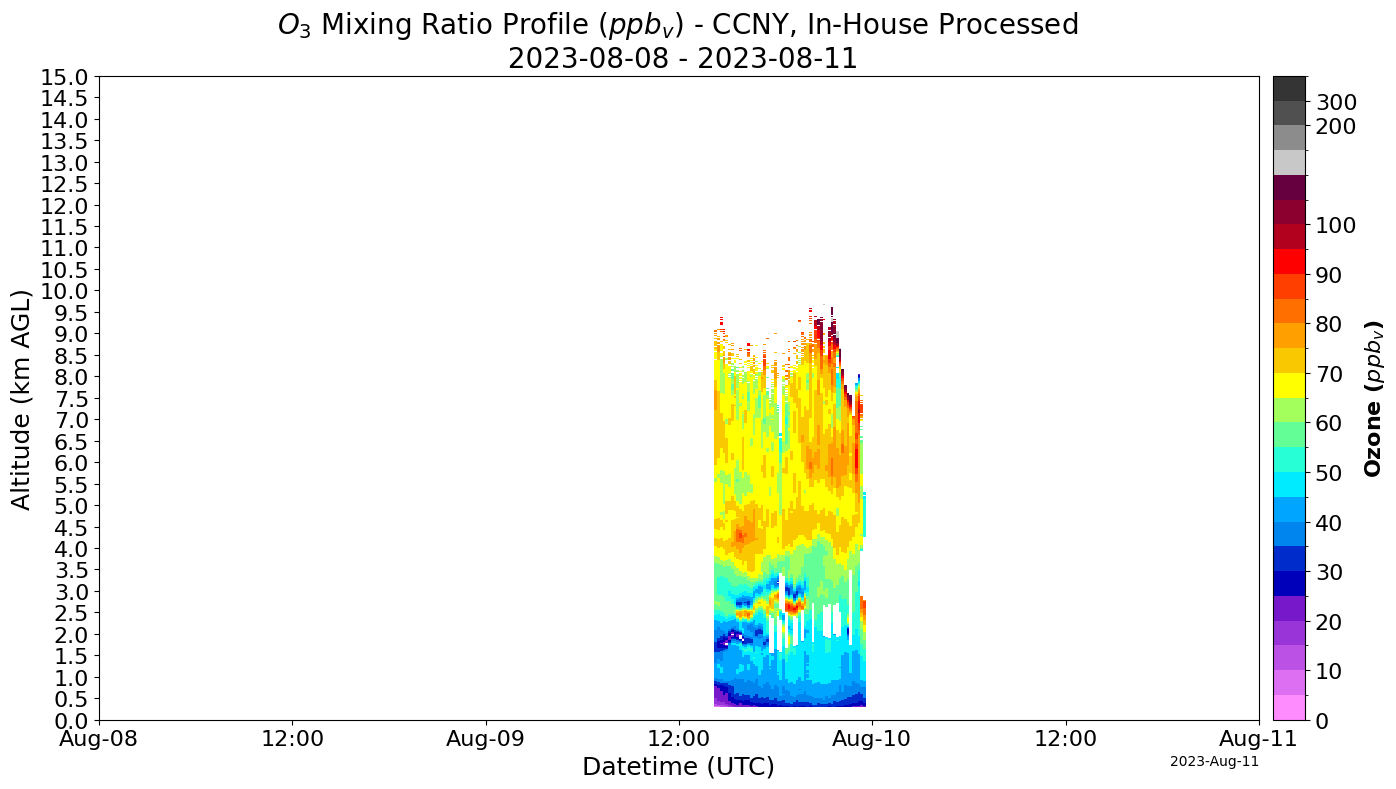

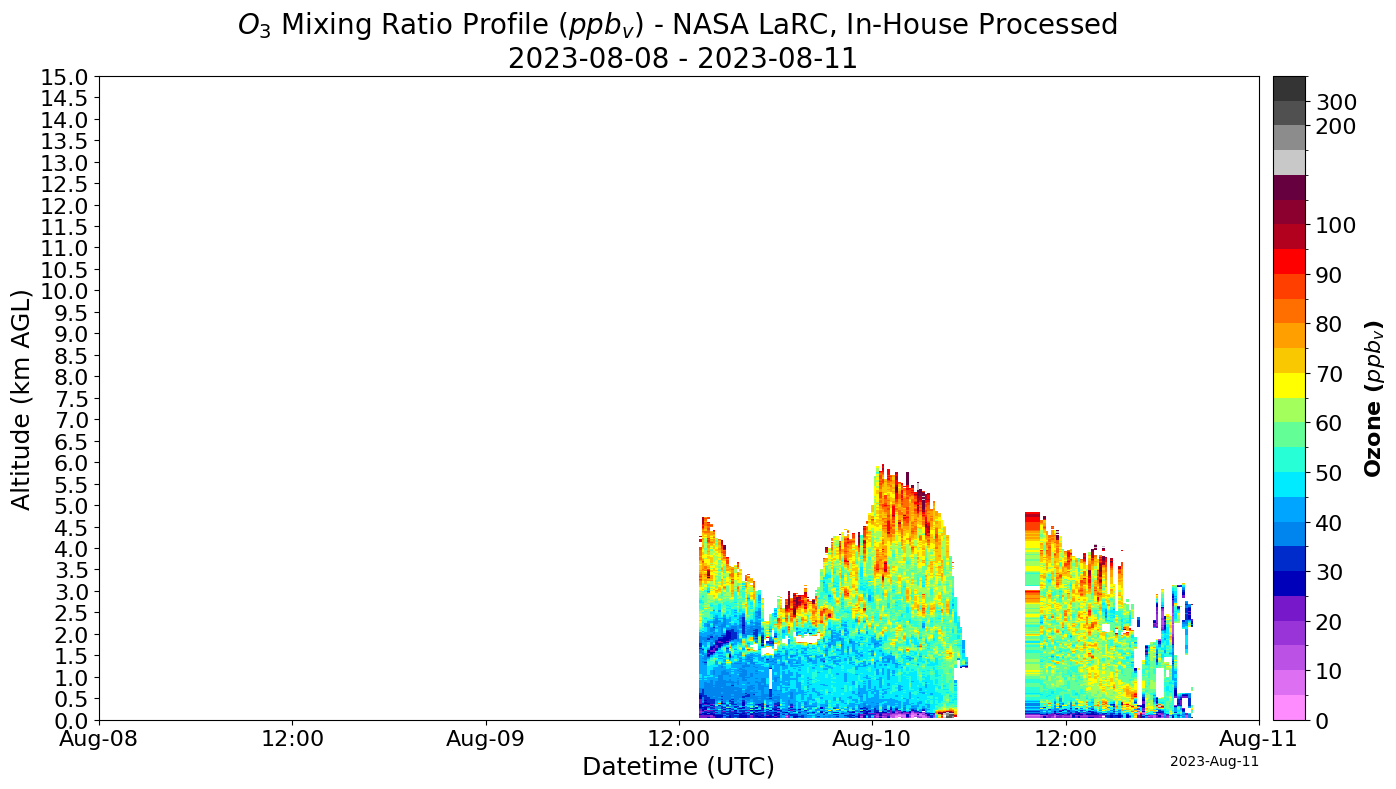

In [7]:
# Plots the data, used after import_data. Puts each combination of instrument group and processing type on a seperate plot.
data.tolnet_curtains()

### Additional parameters for plotting

The tolnet_curtains function can also take the following arguments: `title`, `ylabel`, `xlabel`, `xlims`, `ylims`, `yticks`, and `savefig`. Below are some examples. 



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.49it/s]
C:\Users\meroo\OneDrive - UMBC\Research\NASA\Summer 2024\TOLNET_DEMO\tolnet.py:519: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


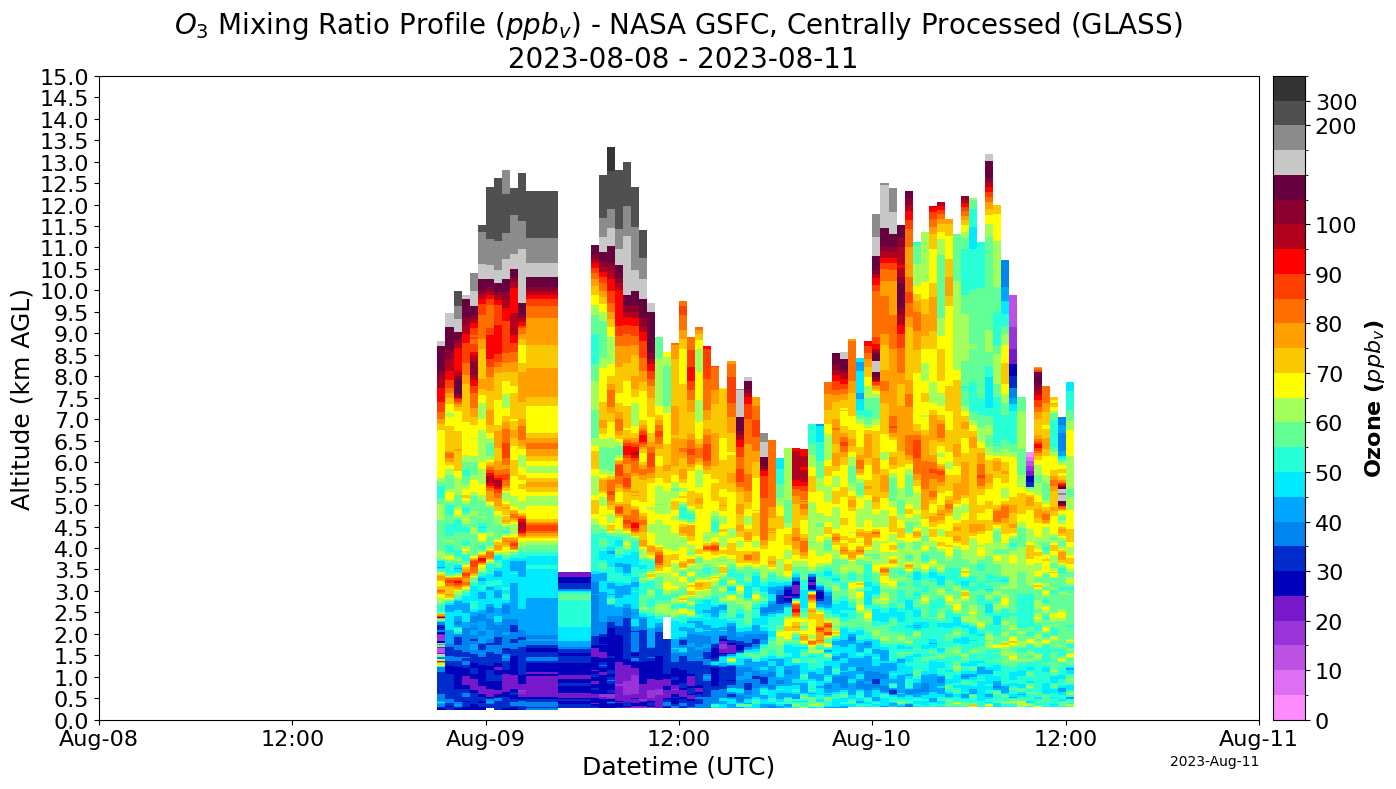

In [8]:
# Copy of previous query for sample data
tolnet = TOLNet()
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4]
lidar_group = [2] # NASA GSFC

# central_processing = [1] # Filtering to only centrally processed data so that only 1 graph is created
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs, instrument_group=lidar_group, processing_type=[1])
data.tolnet_curtains()

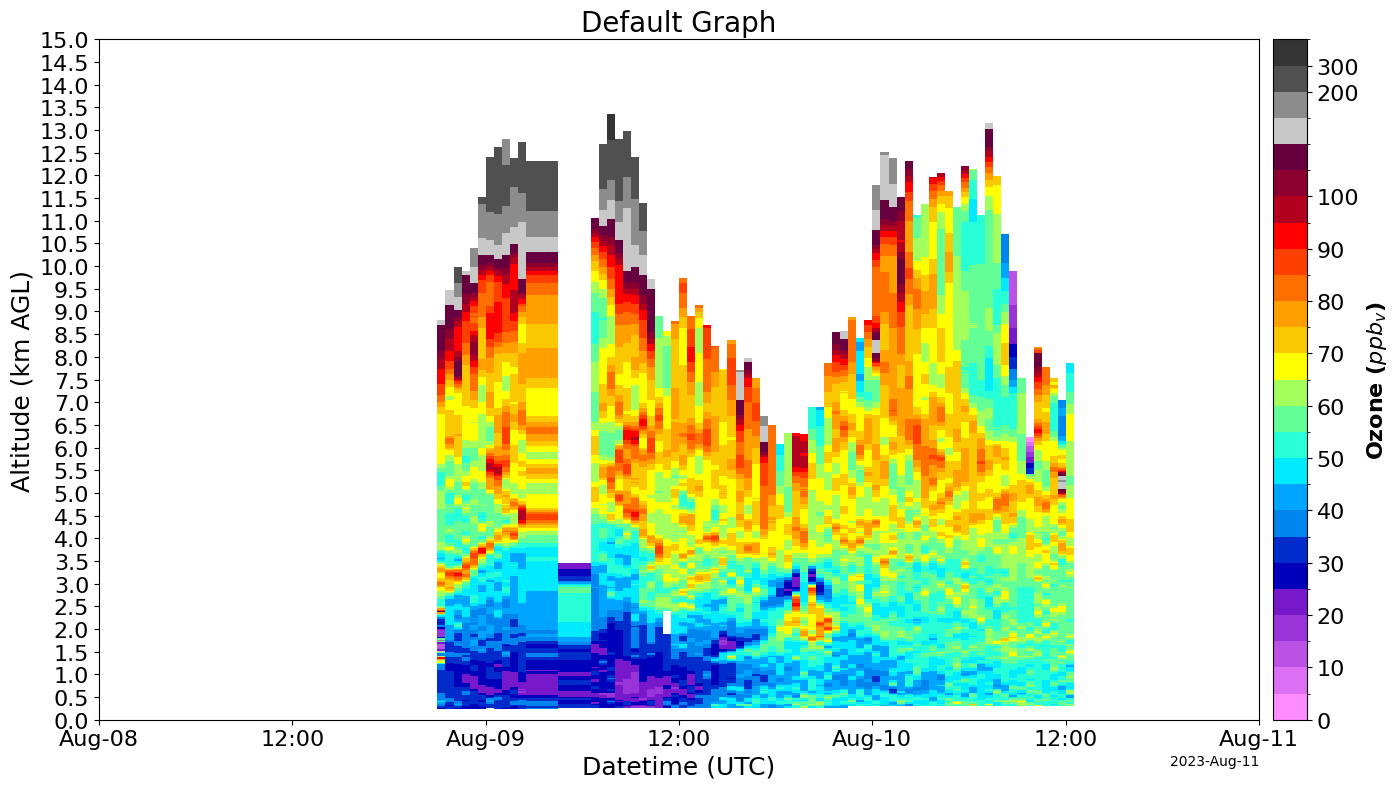

In [9]:
data.tolnet_curtains(title="Default Graph")

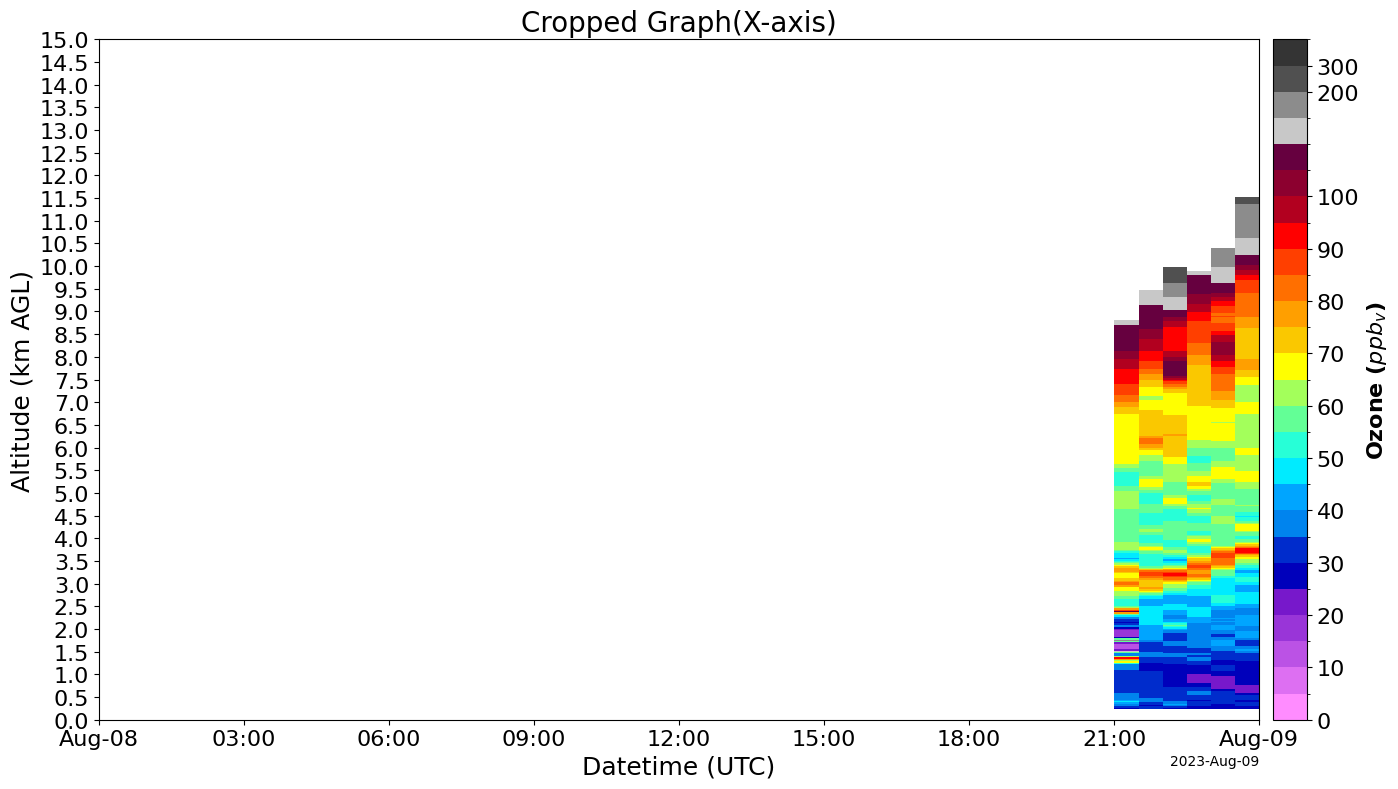

In [10]:
# xlims takes a list of two dates in ISO 8601 Format(YYYY-MM-DD), like this: ['2023-08-05', '2023-08-08'].  
data.tolnet_curtains(xlims=['2023-08-08', '2023-08-09'], title="Cropped Graph(X-axis)")

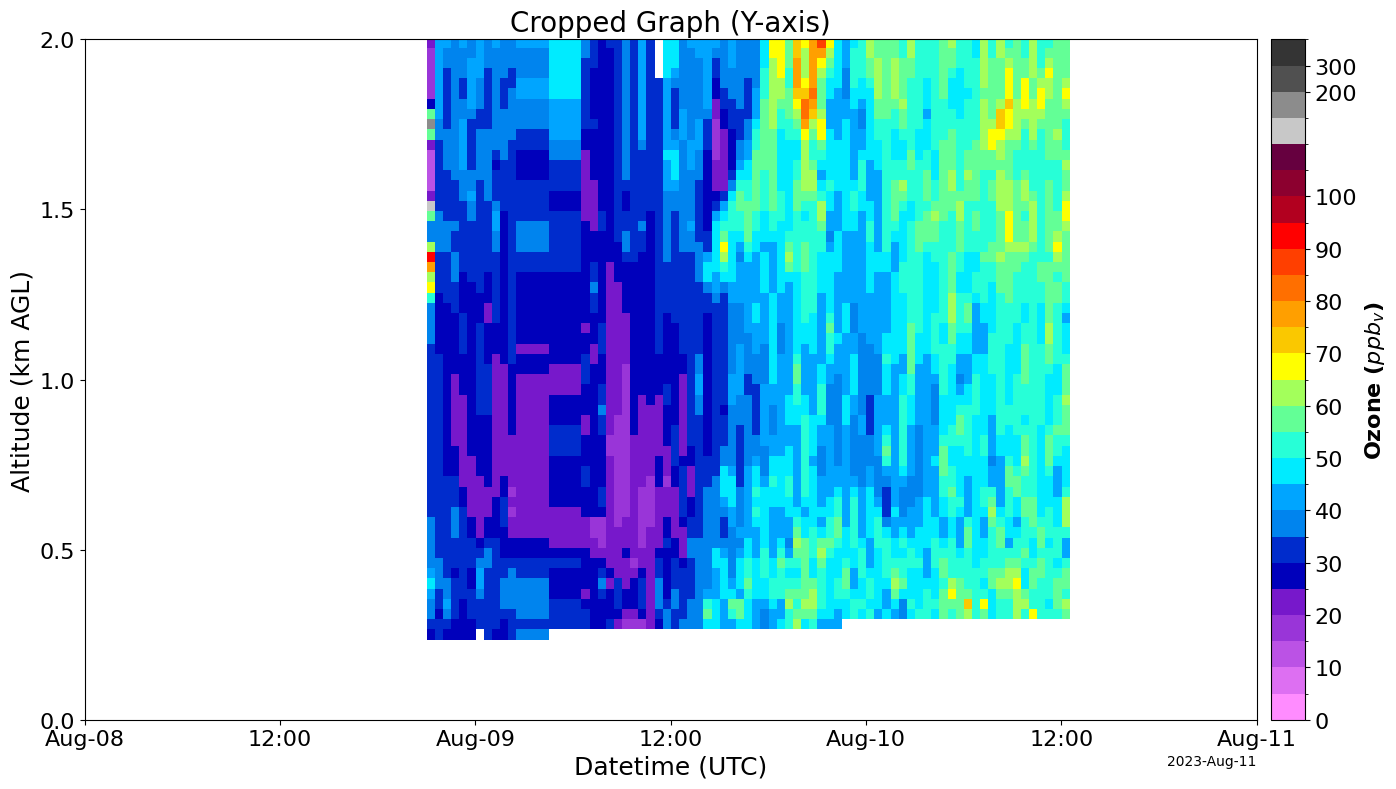

In [11]:
data.tolnet_curtains(ylims=[0, 2], title="Cropped Graph (Y-axis)")

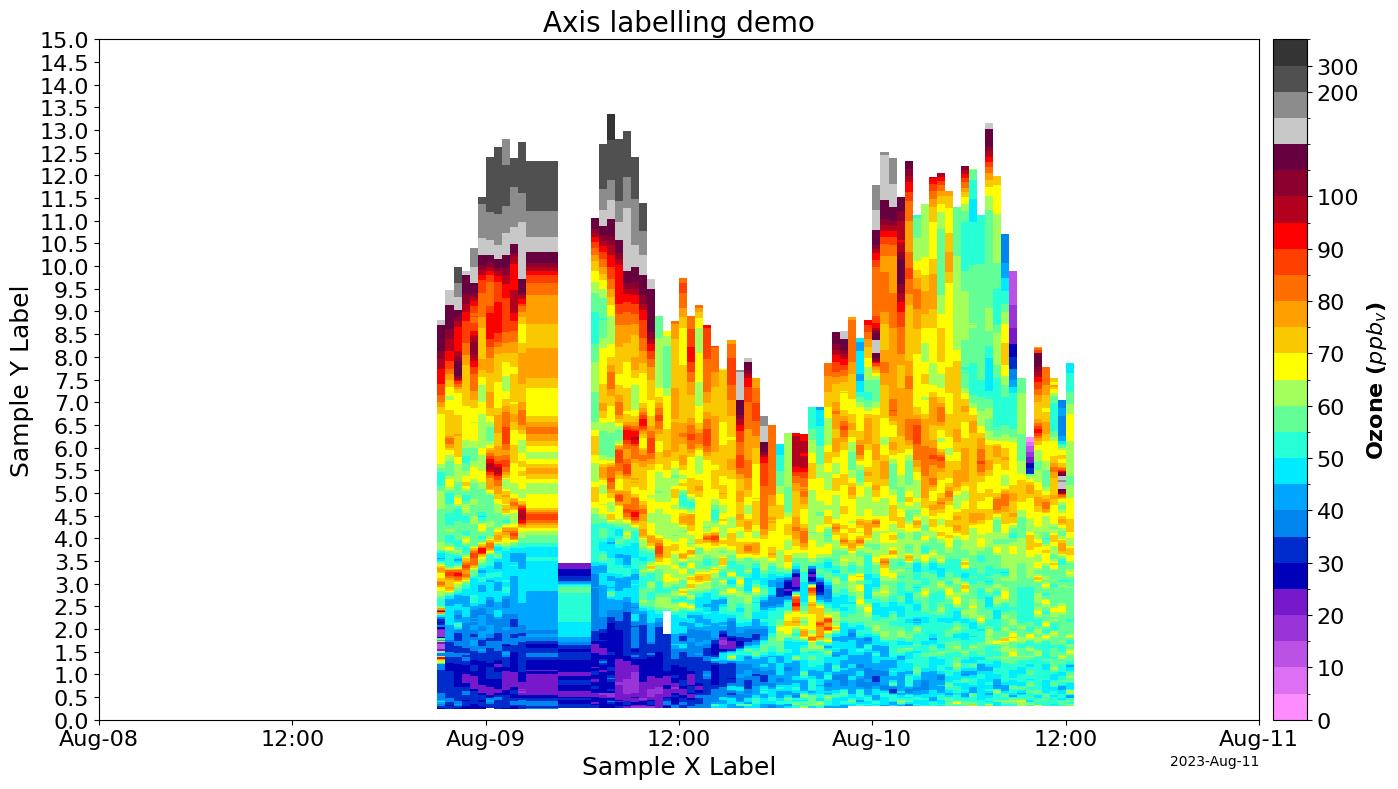

In [12]:
data.tolnet_curtains(xlabel="Sample X Label", ylabel="Sample Y Label", title="Axis labelling demo")

In [13]:
#TODO: Figure out surface and sonde examples

Adding `savefig=True` saves each created figure to a file. Each figure is saved in a file named `(Instrument Group)_(Processing type)_(Start date)_(End date).png`. For example, the above query that creates one graph would be saved as `NASA_GSFC_Centrally_Processed_(GLASS)_2023_08_08_2023_08_11.png`.

### Accessing data directly

In [14]:
# The data can also be accessed directly from the object.
tolnet.data.keys() # Returns each combination of instrument group and processing type that there is data for.



dict_keys(['dates', ('NASA GSFC', 'Centrally Processed (GLASS)')])

In [15]:
sample_key = list(tolnet.data.keys())[-1] # sample_key is now a tuple containing a combination of instrument group and processing type
tolnet.data[sample_key].keys() # Returns each filename with the specified group and type.




dict_keys(['groundbased_lidar.o3_nasa.gsfc003_hires.glass.1.1_oldfield.ny_20230808t210000z_20230808t235959z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires.glass.1.1_oldfield.ny_20230810t000009z_20230810t123041z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires.glass.1.1_oldfield.ny_20230809t000020z_20230809t235948z_001.hdf'])

In [16]:
sample_file = list(tolnet.data[sample_key].keys())[0]
tolnet.data[sample_key][sample_file] # Returns a DataFrame containing the data for that file.

,0.1005,0.1305,0.1605,0.1905,0.2205,0.2505,0.2805,0.3105,0.3405,0.3705,...,11.2305,11.2605,11.2905,11.3205,11.3505,11.3805,11.4105,11.4405,11.4705,11.5005
2023-08-08 21:15:28+00:00,NaN,NaN,NaN,NaN,NaN,27.4,34.3,39.4,37.8,42.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 21:45:35+00:00,NaN,NaN,NaN,NaN,NaN,31.9,32.4,29.3,32.6,34.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 22:15:31+00:00,NaN,NaN,NaN,NaN,NaN,25.7,30.8,36.5,40.9,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 22:45:28+00:00,NaN,NaN,NaN,NaN,NaN,26.3,27.8,31.1,32.7,32.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 23:15:25+00:00,NaN,NaN,NaN,NaN,NaN,26.1,27.8,27.8,29.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 23:45:01+00:00,NaN,NaN,NaN,NaN,NaN,27.0,29.5,31.5,32.5,31.4,...,190.2,192.3,194.4,196.5,198.5,200.5,202.5,204.4,206.3,208.1


In [17]:
tolnet.meta_data[sample_key][sample_file].keys() # Returns a dictionary containing that file's metadata.
metadata = tolnet.meta_data[sample_key][sample_file]

# Remove the data section so that only the metadata is printed, not all of the data which floods the output with thousands of lines
if 'data' in metadata['value']:
    del metadata['value']['data']
if 'data' in metadata['altitude']:
    del metadata['altitude']['data'] 
if 'data' in metadata:
    del metadata['data']
    
metadata

{'fileInfo': {'file_name': 'groundbased_lidar.o3_nasa.gsfc003_hires.glass.1.1_oldfield.ny_20230808t210000z_20230808t235959z_001.hdf',
  'file_size': 175846,
  'isAccessible': True,
  'start_data_date': '2023-08-08 21:00:00',
  'end_data_date': '2023-08-08 23:59:59',
  'upload_date': '2024-05-01 08:51:46.72965',
  'instrument_group_name': 'NASA GSFC',
  'instrument_latitude': 40.96,
  'instrument_longitude': -73.14,
  'instrument_altitude': 3,
  'doi': '10.5067/Lidar/Ozone/TOLNet/NASA-GSFC',
  'citation_url': 'https://asdc.larc.nasa.gov/project/TOLNet/TOLNet_GSFC_Data_1/citation',
  'product_type_name': 'HIRES',
  'processing_type_name': 'Centrally Processed (GLASS)',
  'file_type_name': 'HDF GEOMS (Standard)',
  'revision': 1,
  'near_real_time': 'f'},
 'altitude': {'attributes': {'VAR_DESCRIPTION': 'Altitude above sea level (km)',
   'VAR_VALID_MIN': -0.3,
   'VAR_VALID_MAX': 120,
   'VAR_UNITS': 'km',
   'VAR_FILL_VALUE': -999}},
 'datetime': {'attributes': {'VAR_DESCRIPTION': 'Weigh

## Comparison with GEOS CF <a class="anchor" id="comparison_geos_cf"></a>
(WIP)

# Testbed

In [18]:
import requests
import pandas as pd
import numpy as np
def get_files_list():
    """
    Parameters
    ----------
    min_date : STR
        The starting date for the query, in YYYY-MM-DD format.
    max_date : STR
        The ending date for the query, in YYYY-MM-DD format.

    Returns
    -------
    A DataFrame containing all files from the TOLNet API that fall between the two provided dates.
    The DataFrame contains each file name as well as various descriptors.
    """
    dtypes = {"row": "int16",
             "count": "int16",
             "id": "int16",
             "file_name": "str",
             "file_server_location": "str",
             "author": "str",
             "instrument_group_id": "int16",
             "product_type_id": "int16",
             "file_type_id":"int16",
             "start_data_date": "datetime64[ns]",
             "end_data_date":"datetime64[ns]",
             "upload_date":"datetime64[ns]",
             "public": "bool",
             "instrument_group_name": "str",
             "folder_name": "str",
             "current_pi": "str",
             "doi": "str",
             "citation_url": "str",
             "product_type_name": "str",
             "processing_type_name": "str",
             "file_type_name": "str",
             "revision": "int16",
             "near_real_time": "str",
             "file_size": "int16",
             "latitude": "float16",
             "longitude": "float16",
             "altitude": "int16",
             "isAccessible": "bool"
             }

    i = 1
    url = f"https://tolnet.larc.nasa.gov/api/data/1?&order=data_date&order_direction=desc"
    response = requests.get(url)
    data_frames = []
    while response.status_code == 200:
        data_frames.append(pd.DataFrame(response.json()))
        i += 1
        url = f"https://tolnet.larc.nasa.gov/api/data/{i}?&order=data_date&order_direction=desc"
        response = requests.get(url)
        
        if i % 10 == 0:
            print(i)
            

    df = pd.concat(data_frames, ignore_index=True)
    df["start_data_date"] = pd.to_datetime(df["start_data_date"])
    df["end_data_date"] = pd.to_datetime(df["end_data_date"])
    df["upload_date"] = pd.to_datetime(df["upload_date"])
    return df.astype(dtypes)


In [19]:
all_files = get_files_list()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170


In [20]:
all_files['lat_long'] = [f"{all_files['latitude'].iloc[i]}_{all_files['longitude'].iloc[i]}" for i in range(len(all_files))]

In [21]:
unique_latlong = np.array(pd.unique(all_files['lat_long']))
#all_files['lat_long']


In [22]:
unique_latlong
lats, longs = [], []
for line in unique_latlong:
    lats.append(float(line.split('_')[0]))
    longs.append(float(line.split('_')[1]))

In [23]:
from pathlib import Path
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
states = geopandas.read_file(Path(r"..\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp"))

In [ ]:
import geopandas, geodatasets
import pandas
import matplotlib.pyplot as plt

In [ ]:
earth = geopandas.read_file(geodatasets.get_path("naturalearth.land"))

In [ ]:
xlims, ylims = [-125, -60], [20, 65]

stations = [
    {'name': 'ECCC', 'latitude': 44.371, 'longitude': -79.851},
    {'name': 'NASA GSFC', 'latitude': 38.99, 'longitude': -76.84},
    {'name': 'NOAA ESRL/CSL', 'latitude': 39.99, 'longitude': -105.26},
    {'name': 'UAH', 'latitude': 34.73, 'longitude': -86.65},
    {'name': 'CCNY', 'latitude': 40.821, 'longitude': -73.949},
    {'name': 'Hampton U', 'latitude': 37.02, 'longitude': -76.34},
    {'name': 'NASA JPL', 'latitude': 34.38, 'longitude': -117.68}]

homebases = pandas.DataFrame(stations)
fig, ax = plt.subplots(figsize=(20, 20), layout="tight")
plt.title("TOLNet Dataset Locations", fontsize=36, loc="center", y=1.05)
earth.plot(ax=ax, color="lightsteelblue")
states.boundary.plot(ax=ax, color="black")
plt.plot(longs, lats, "o", color="yellow", markersize=15, label="Campaign Data")
plt.plot(homebases['longitude'], homebases['latitude'], "o", color="red", markersize=15, label="Homebase Locations")

plt.ylim(ylims)
plt.xlim(xlims)
ax.legend(ncols=2, bbox_to_anchor=(0.5, 1.02), loc="center", fontsize=18)
plt.show()
print(xlims, ylims)

The following is a map of each instrument group's homebase.

In [ ]:
%%capture
!pip install folium

In [ ]:
import folium

stations = [
    {'name': 'ECCC', 'latitude': 57.184, 'longitude': -111.640},
    {'name': 'NASA GSFC', 'latitude': 38.99, 'longitude': -76.84},
    {'name': 'NOAA ESRL/CSL', 'latitude': 39.99, 'longitude': -105.26},
    {'name': 'UAH', 'latitude': 34.73, 'longitude': -86.65},
    {'name': 'CCNY', 'latitude': 40.821, 'longitude': -73.949},
    {'name': 'Hampton U', 'latitude': 37.02, 'longitude': -76.34},
    {'name': 'NASA JPL', 'latitude': 34.38, 'longitude': -117.68}
]
# Not included here: NASA JPL, NASA LaRC
# CCNY has no altitude listed

# Create a map centered around the average latitude and longitude of the stations
map_center = [sum(station['latitude'] for station in stations) / len(stations),
              sum(station['longitude'] for station in stations) / len(stations)]

homebase_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each station
lat_bounds = [None, None]
long_bounds = [None, None]
for station in stations:
    current_lat = station['latitude']
    current_long = station['longitude']

    #Get minimum and maximum latitudes to zoom the map appropriately
    if lat_bounds[0] == None or current_lat < lat_bounds[0]:
        lat_bounds[0] = current_lat
    if lat_bounds[1] == None or current_lat > lat_bounds[1]:
        lat_bounds[1] = current_lat
    if long_bounds[0] == None or current_long < long_bounds[0]:
        long_bounds[0] = current_long
    if long_bounds[1] == None or current_long > long_bounds[1]:
        long_bounds[1] = current_long
        
    folium.Marker(
        location=[station['latitude'], station['longitude']],
        popup=station['name'],
        tooltip=station['name']
    ).add_to(homebase_map)
homebase_map.fit_bounds([[lat_bounds[0], long_bounds[0]], [lat_bounds[1], long_bounds[1]]]) 

In [ ]:
# Shows a map of each instrument group's homebase.
# You may need to trust this notebook by going to File -> Trust notebook to get it to show.
homebase_map

In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits
import datetime
from dateutil import tz

In [ ]:
test_url_o3 = r"https://dphttpdev01.nccs.nasa.gov/data-services/cfapi/assim/chm/v72/O3/39x-77/20230808/20230811"
test_url_met = r"https://dphttpdev01.nccs.nasa.gov/data-services/cfapi/assim/met/v72/MET/39x-77/20230808/20230811"

In [ ]:
ozone_response = requests.get(test_url_o3).json()

In [ ]:
ozone = pd.DataFrame(ozone_response['values']['O3'])
ozone.columns = pd.to_numeric(heights.columns)
ozone.sort_index(axis=1, inplace=True)

In [ ]:
height_response = requests.get(test_url_met).json()

In [ ]:
heights = pd.DataFrame(height_response['values']['ZL'])
heights.columns = pd.to_numeric(heights.columns)
heights.sort_index(axis=1, inplace=True)

In [ ]:
times = pd.to_datetime(ozone_response['time'], utc=True, format="%Y-%m-%dT%H:%M:%S")
times = np.tile(times, (72, 1))
# key = times[0].strftime("%Y-%m-%d")

In [ ]:
print(heights.shape)
print(times.shape)
print(ozone.shape)

In [ ]:
geos_cf = {("GEOS_CF", "Replay"): {key:{"height": heights.to_numpy(),
                                       "ozone": ozone.to_numpy(), 
                                       "time": times.T}}}

In [ ]:
tolnet = TOLNet()
ncmap, nnorm = tolnet.O3_curtain_colors()
fig, ax = plt.subplots(1, 1, figsize=(15, 8), layout="tight")


for key in geos_cf:
    for date in geos_cf[key]:
        
        X, Y, Z = (geos_cf[key][date]["time"], 
                   geos_cf[key][date]["height"], 
                   geos_cf[key][date]["ozone"])
                   
        im = ax.pcolormesh(X, Y, Z, cmap=ncmap, norm=nnorm, shading="nearest")
    cbar = fig.colorbar(im, ax=ax, pad=0.01, ticks=[0.001, *np.arange(10, 101, 10), 200, 300])
    cbar.set_label(label='Ozone ($ppb_v$)', size=16, weight="bold")
    converter = mdates.ConciseDateConverter()
    munits.registry[datetime.datetime] = converter

    # ax.xaxis_date(timezone)
    plt.title(f"$O_3$ Mixing Ratio Profile ($ppb_v$) - {key[0]} {key[1]}", fontsize=20)
# fonts
    
    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)
    cbar.ax.tick_params(labelsize=16)
    
    ax.set_ylabel("Altitude (m AGL)", fontsize=18)
    ax.set_xlabel("Datetime (UTC)", fontsize=18)
    ax.set_ylim([0, 15000])
plt.show()

    
"""
    if "ylabel" in kwargs.keys():
        ax.set_ylabel(kwargs["ylabel"], fontsize=18)
    else: ax.set_ylabel("Altitude (km AGL)", fontsize=18)

    if "xlabel" in kwargs.keys():
        ax.set_xlabel(kwargs["xlabel"], fontsize=20)
    else: ax.set_xlabel("Datetime (UTC)", fontsize=18)

    if "xlims" in kwargs.keys():
        lim = kwargs["xlims"]
        lims = [np.datetime64(lim[0]), np.datetime64(lim[-1])]
    else:
        lim = self.data['dates']
        lims = [np.datetime64(lim[0]), np.datetime64(lim[-1])]
    ax.set_xlim(lims)

    if "ylims" in kwargs.keys():
        ax.set_ylim(kwargs["ylims"])

    if "yticks" in kwargs.keys():
        ax.set_yticks(kwargs["yticks"], fontsize=20)

    if "surface" in kwargs.keys():
        X, Y, C = kwargs["surface"]
        ax.scatter(X, Y, c=C, cmap=ncmap, norm=nnorm)

    if "sonde" in kwargs.keys():
        X, Y, C = kwargs["sonde"]
        ax.scatter(X, Y, c=C, cmap=ncmap, norm=nnorm)
        
    if "title" in kwargs.keys():
        plt.title(kwargs["title"], fontsize=18)
    else: 
        plt.title(f"$O_3$ Mixing Ratio Profile ($ppb_v$) - {key[0]}, {key[1]} \n {str(lims[0])} - {str(lims[1])}", fontsize=20)
        
    if "savefig" in kwargs.keys() and kwargs['savefig']:
        plotname = f"{key[0]}_{key[1]}_{str(lims[0])}_{str(lims[-1])}.png"
        plotname = plotname.replace(' ', '_').replace('-', '_').replace('\\', '').replace('/', '')
        plt.savefig(f"{plotname}", dpi=350)
"""


In [3]:
from IPython.display import IFrame

IFrame(src='test.html', width=700, height=600)

In [2]:
import pydeck as pdk

# Define the stations
stations = [
    {'name': 'ECCC', 'latitude': 57.184, 'longitude': -111.640},
    {'name': 'NASA GSFC', 'latitude': 38.99, 'longitude': -76.84},
    {'name': 'NOAA ESRL/CSL', 'latitude': 39.99, 'longitude': -105.26},
    {'name': 'UAH', 'latitude': 34.73, 'longitude': -86.65},
    {'name': 'CCNY', 'latitude': 40.821, 'longitude': -73.949},
    {'name': 'Hampton U', 'latitude': 37.02, 'longitude': -76.34},
    {'name': 'NASA JPL', 'latitude': 34.38, 'longitude': -117.68}
]

# Create a list of data points for Pydeck
data = [{'name': station['name'], 'coordinates': [station['longitude'], station['latitude']]} for station in stations]

# Define a layer to display on a map
layer = pdk.Layer(
    'ScatterplotLayer',
    data,
    get_position='coordinates',
    get_radius=50000,
    get_fill_color=[255, 0, 0],
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-98.5795, # Central longitude of USA
    latitude=39.8283,   # Central latitude of USA
    zoom=4,
    pitch=0
)

# Render the deck.gl map
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}"})
r.to_html("test.html")
